In [1]:
import numpy as np

In [3]:
labels = []
for i in range(10):
    temp_list = [i] * 4
    labels += temp_list

labels = np.array(labels)

n_class_per_task = 2
current_task = 0
total_tasks = 5

mask_1 = np.logical_and(labels >= current_task, labels < current_task + n_class_per_task)
mask_2 = np.logical_and(labels >= current_task + n_class_per_task, labels < current_task + 2 * n_class_per_task)
       
# index_1 = [True for i, bol in enumerate(mask_1) if bol and i < int(len(mask_1) * 2 / 3)]
index_2 = [i for i, bol in enumerate(mask_2) if bol]
index_1 = [i for i, bol in enumerate(mask_1) if bol]

final_index = np.concatenate([index_1[:int(len(index_1) * 2 / 3)], index_2[int(len(index_1) * 2 / 3):]])
# final_index = index_2[int(len(index_1) * 2 / 3):]
# index_1
modified_mask_1 = np.array([i in final_index for i in range(len(labels))])


In [4]:
targets = labels[modified_mask_1]
# targets_str = [str(i) for i in targets]
# labels = set(list(targets))
label_dict = {}
for tgt in targets:
    if tgt in label_dict.keys():
        label_dict[tgt] += 1
    else:
        label_dict[tgt] = 1

In [5]:
label_dict

{0: 4, 1: 1, 3: 3}

In [14]:
modified_mask_1

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [10]:
mask_1

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [4]:
import sklearn
import hdbscan
import pandas as pd
import numpy as np
from math import pi, cos, sin, atan2, sqrt
from sklearn import datasets
import matplotlib.pyplot as plt # 画图工具
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import torch
# sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True)

(100, 2)
(100,)


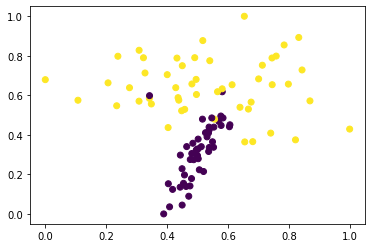

In [10]:
data,target=datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1)
# data,target=datasets.make_classification(n_samples=100, n_features=256, n_informative=32, n_redundant=224,n_repeated=0, n_classes=2, n_clusters_per_class=1)
print(data.shape)
print(target.shape)

min_max_scaler = MinMaxScaler()
data = min_max_scaler.fit_transform(data)

data_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(data)
plt.scatter(data[:,0],data[:,1],c=target)

# plt.scatter(data_embedded[:,0],data_embedded[:,1],c=target)
plt.show()

{0, 1, -1}


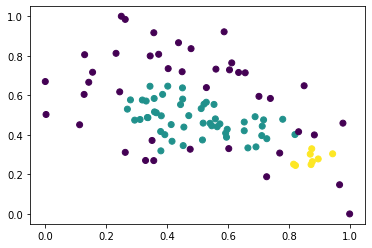

In [106]:
# pca = PCA(n_components=32)
# pca.fit(data)
# data_reduced = pca.transform(data)
# print(data_reduced.shape)
data_reduced = data

# data_sim = cosine_similarity(data_reduced, data_reduced)

# dbsc = hdbscan.HDBSCAN(metric="euclidean", min_cluster_size=5).fit(data_reduced)
data_sim = sklearn.metrics.pairwise.euclidean_distances(data_reduced, data_reduced)
dbsc = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=5).fit(data_sim)
cluster_labels = dbsc.labels_
cluster_probs = dbsc.probabilities_
print(set(cluster_labels))
# palette = sns.color_palette()
# cluster_colors = [sns.desaturate(palette[col], sat)
#                   if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
#                   zip(cluster_labels, cluster_probs)]
# plt.scatter(data_embedded[:,0],data_embedded[:,1],c=cluster_colors)
# plt.scatter(data_embedded[:,0],data_embedded[:,1],c=cluster_labels)
plt.scatter(data[:,0],data[:,1],c=cluster_labels)
plt.show()

In [1]:
# data,target=datasets.make_classification(n_samples=100, n_features=256, n_informative=32, n_redundant=224,n_repeated=0, n_classes=2, n_clusters_per_class=1)
np.random.seed(1)
data,target=datasets.make_classification(n_samples=12000, n_features=32, n_informative=32, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1)

print(data.shape)
print(target.shape)

min_max_scaler = MinMaxScaler()
data = min_max_scaler.fit_transform(data)

data_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(data)

colors = ['r' if t == 0 else 'b' for t in target ]
plt.scatter(data_embedded[:,0],data_embedded[:,1],c=colors)


# pca = PCA(n_components=4)
# pca.fit(data)
# data_reduced = pca.transform(data)
# print(data_reduced.shape)

data_reduced = data

# data_sim = cosine_similarity(data_reduced, data_reduced)
# dbsc = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2).fit(data_sim)
# dbsc = hdbscan.HDBSCAN(metric="l2", min_cluster_size=5).fit(data_reduced)

dbsc = hdbscan.HDBSCAN(metric="l2", min_cluster_size=4).fit(data_reduced)
cluster_labels = dbsc.labels_
cluster_probs = dbsc.probabilities_
# print(set(cluster_labels))
cluster_df = pd.DataFrame({'label': cluster_labels, 'probs': cluster_probs})
print(cluster_df['label'].value_counts())
plt.show()
# print(cluster_df['label'].unique())

# prototype_list = []
# for label in cluster_df['label'].unique():
#     if label >= 0:
#         relatedness = torch.Tensor(cluster_df[cluster_df['label'] == label]['probs'].to_numpy())
#         relatedness_val, relatedness_ind = relatedness.topk(k=5, dim=0)
#         # print(relatedness_val)
#         # print(relatedness_ind)
#         prototype_idx = list(cluster_df[cluster_df['label'] == label].iloc[relatedness_ind].index)
#         prototype_list.append(data[prototype_idx, :])
# prototype_list


NameError: name 'np' is not defined

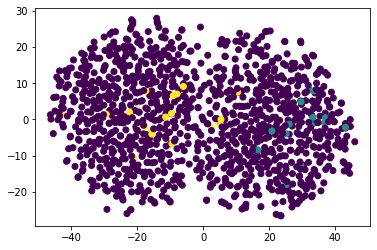

In [4]:
# color_dict = {-1:'black', 0: 'b', 1:'r'}
# colors = [color_dict[t] for t in cluster_labels ]
plt.scatter(data_embedded[:,0],data_embedded[:,1],c=cluster_labels)
plt.show()

[0. 0. 0. ... 1. 1. 1.]


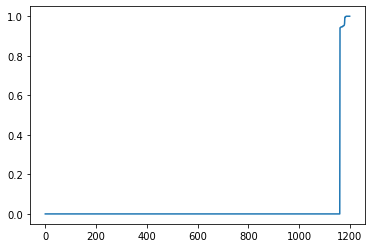

In [9]:
print(np.sort(cluster_probs))
plt.plot(np.sort(cluster_probs))
plt.show()

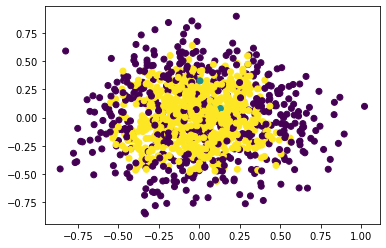

In [115]:
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=cluster_labels)
plt.show()

<AxesSubplot:ylabel='distance'>

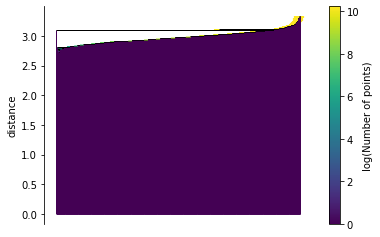

In [85]:
dbsc.single_linkage_tree_.plot(cmap='viridis', colorbar=True)


In [ ]:
# import hdbscan
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# from math import pi, cos, sin, atan2, sqrt


def get_centroid(cluster):
    x = y = z = 0
    coord_num = len(cluster)
    for coord in cluster:
        lat = coord[0] * pi / 180
        lon = coord[1] * pi / 180

        a = cos(lat) * cos(lon)
        b = cos(lat) * sin(lon)
        c = sin(lat)

        x += a
        y += b
        z += c
    x /= coord_num
    y /= coord_num
    z /= coord_num
    lon = atan2(y, x)
    hyp = sqrt(x * x + y * y)
    lat = atan2(z, hyp)
    return [lat * 180 / pi, lon * 180 / pi]


df = pd.read_excel("test.xlsx")

hotel_df = df[['latitude', 'longitude']]
hotel_df = hotel_df.dropna(axis=0, how='any')
hotel_coord = hotel_df.values

hotel_dbsc = hdbscan.HDBSCAN(metric="haversine", min_cluster_size=int(len(hotel_df) / 50)).fit(np.radians(hotel_coord))
hotel_df['labels'] = hotel_dbsc.labels_
hotel_df['probab'] = hotel_dbsc.probabilities_
hotel_df.loc[hotel_df['probab'] < 0.5, 'labels'] = -1  # HDBSCAN边界可能存在问题，将置信度<0.5的设为为噪音点

cluster_list = hotel_df['labels'].value_counts(dropna=False)
center_coords = []
for index, item_count in cluster_list.iteritems():
    if index != -1:
        df_cluster = hotel_df[hotel_df['labels'] == index]
        center_coord = get_centroid(df_cluster[["latitude", "longitude"]].values)
        center_lat = center_coord[0]
        center_lon = center_coord[1]
        center_coords.append(center_coord)
center_coords = pd.DataFrame(center_coords, columns=['latitude', 'longitude'])
print(center_coords)

# 可视化
fig, ax = plt.subplots(figsize=[20, 12])
facility_scatter = ax.scatter(hotel_df['longitude'], hotel_df['latitude'], c=hotel_df['labels'], cmap=cm.Dark2,
                              edgecolor='None',
                              alpha=0.7, s=120)
centroid_scatter = ax.scatter(center_coords['longitude'], center_coords['latitude'], marker='x', linewidths=2,
                              c='k', s=50)
ax.set_title('Facility Clusters & Facility Centroid', fontsize=30)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize=24)
ax.set_xlim(120, 122)
ax.set_ylim(30, 33)
ax.legend([facility_scatter, centroid_scatter], ['Facilities', 'Facility Cluster Centroid'], loc='upper right',
          fontsize=20)
plt.show()

In [6]:
import sys
sys.path

['/export/data/hliubm/ucl',
 '/export/data/hliubm/.vscode-server/extensions/ms-toolsai.jupyter-2022.4.1011282140/pythonFiles',
 '/export/data/hliubm/.vscode-server/extensions/ms-toolsai.jupyter-2022.4.1011282140/pythonFiles/lib/python',
 '/export/data/hliubm/miniconda3/envs/ucl/lib/python38.zip',
 '/export/data/hliubm/miniconda3/envs/ucl/lib/python3.8',
 '/export/data/hliubm/miniconda3/envs/ucl/lib/python3.8/lib-dynload',
 '/export/data/hliubm/miniconda3/envs/ucl/lib/python3.8/site-packages']

(12000, 256)
(12000,)


/export/data/hliubm/miniconda3/envs/ucl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


 0    2582
 1    2510
 3    2392
-1    2260
 2    2256
Name: label, dtype: int64


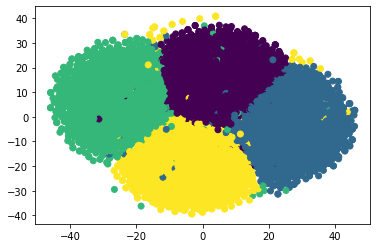

In [3]:
# data,target=datasets.make_classification(n_samples=100, n_features=256, n_informative=32, n_redundant=224,n_repeated=0, n_classes=2, n_clusters_per_class=1)
np.random.seed(1)
data,target=datasets.make_classification(n_samples=12000, n_features=256, n_informative=128, n_redundant=32, n_repeated=96, n_classes=4, n_clusters_per_class=1)

print(data.shape)
print(target.shape)

min_max_scaler = MinMaxScaler()
data = min_max_scaler.fit_transform(data)

# pca = PCA(n_components=64)
# pca.fit(data)
# data = pca.transform(data)
# print(data.shape)

data_embedded = TSNE(n_components=2, learning_rate='auto', perplexity=40,
                  init='pca').fit_transform(data)

# colors = ['r' if t == 0 else 'b' for t in target ]
plt.scatter(data_embedded[:,0],data_embedded[:,1],c=target)


# data_reduced = data

# data_sim = cosine_similarity(data_reduced, data_reduced)
# dbsc = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2).fit(data_sim)
# dbsc = hdbscan.HDBSCAN(metric="l2", min_cluster_size=5).fit(data_reduced)

dbsc = hdbscan.HDBSCAN(metric="euclidean", min_cluster_size=30).fit(data_embedded)
cluster_labels = dbsc.labels_
cluster_probs = dbsc.probabilities_
# print(set(cluster_labels))
cluster_df = pd.DataFrame({'label': cluster_labels, 'probs': cluster_probs})
print(cluster_df['label'].value_counts())
plt.show()
# print(cluster_df['label'].unique())

# prototype_list = []
# for label in cluster_df['label'].unique():
#     if label >= 0:
#         relatedness = torch.Tensor(cluster_df[cluster_df['label'] == label]['probs'].to_numpy())
#         relatedness_val, relatedness_ind = relatedness.topk(k=5, dim=0)
#         # print(relatedness_val)
#         # print(relatedness_ind)
#         prototype_idx = list(cluster_df[cluster_df['label'] == label].iloc[relatedness_ind].index)
#         prototype_list.append(data[prototype_idx, :])
# prototype_list


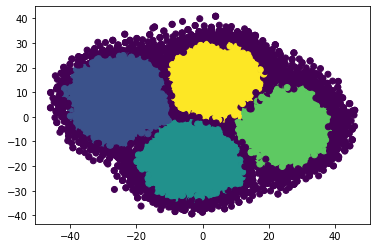

In [11]:
plt.scatter(data_embedded[:,0],data_embedded[:,1],c=cluster_labels)
plt.show()

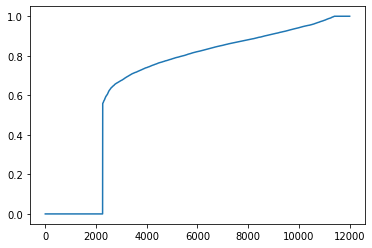

In [12]:
# print(np.sort(cluster_probs))
plt.plot(np.sort(cluster_probs))
plt.show()

In [13]:
large_prob = [prob for prob in cluster_probs if prob > 0.9]
len(large_prob)

3362

In [15]:
cluster_df[cluster_df['probs'] > 0.9]['label'].value_counts()

2    1136
1     895
3     862
0     469
Name: label, dtype: int64

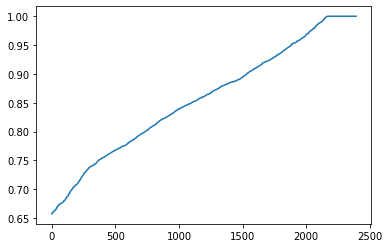

In [8]:
plt.plot(cluster_df[cluster_df['label'] == 3]['probs'].sort_values().to_numpy())

In [15]:
# data/CIFAR10

import torchvision.transforms as transforms
import torchvision
import torch
import numpy as np
import os
import codecs
from torch.distributions.categorical import Categorical
import torch.utils.data as data
from PIL import Image
import errno

class SubDataSet(torch.utils.data.Dataset):
    """
    Obtain the sub data sets with respect to classes
    """
    def __init__(self, dataset, selected_classes):
        super(SubDataSet,self).__init__()
        self.selected_classes = selected_classes
        self.dataset = [dataset[i] for i in range(len(dataset)) if dataset[i][1] in selected_classes]

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        return self.dataset[index]

class DatasetsLoaders:
    def __init__(self, dataset, selected_classes, batch_size=4, num_workers=4, pin_memory=True, **kwargs):
        self.dataset_name = dataset
        self.valid_loader = None
        self.num_workers = num_workers
        if self.num_workers is None:
            self.num_workers = 4

        pin_memory = pin_memory if torch.cuda.is_available() else False
        self.batch_size = batch_size
        cifar10_mean = (0.5, 0.5, 0.5)
        cifar10_std = (0.5, 0.5, 0.5)
        cifar100_mean = (0.5070, 0.4865, 0.4409)
        cifar100_std = (0.2673, 0.2564, 0.2761)
        mnist_mean = [33.318421449829934]
        mnist_std = [78.56749083061408]
        fashionmnist_mean = [73.14654541015625]
        fashionmnist_std = [89.8732681274414]

        if dataset == "CIFAR10":
            # CIFAR10:
            #   type               : uint8
            #   shape              : train_set.train_data.shape (50000, 32, 32, 3)
            #   test data shape    : (10000, 32, 32, 3)
            #   number of channels : 3
            #   Mean per channel   : train_set.train_data[:,:,:,0].mean() 125.306918046875
            #                        train_set.train_data[:,:,:,1].mean() 122.95039414062499
            #                        train_set.train_data[:,:,:,2].mean() 113.86538318359375
            #   Std per channel   :  train_set.train_data[:, :, :, 0].std() 62.993219278136884
            #                        train_set.train_data[:, :, :, 1].std() 62.088707640014213
            #                        train_set.train_data[:, :, :, 2].std() 66.704899640630913
            self.mean = cifar10_mean
            self.std = cifar10_std

            transform_train = transforms.Compose([
                transforms.RandomCrop(32, padding=4),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
            ])

            transform_test = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
            ])

            self.train_set = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=True,
                                                          download=True, transform=transform_train)
            # self.train_loader = torch.utils.data.DataLoader(self.train_set, batch_size=self.batch_size,
            #                                                 shuffle=True, num_workers=self.num_workers,
            #                                                 pin_memory=pin_memory)

            self.test_set = torchvision.datasets.CIFAR10(root='./data/CIFAR10', train=False,
                                                         download=True, transform=transform_test)
            # self.test_loader = torch.utils.data.DataLoader(self.test_set, batch_size=self.batch_size,
            #                                                shuffle=False, num_workers=self.num_workers,
            #                                                pin_memory=pin_memory)
            
            selected_classes = selected_classes
            self.num_of_tasks = len(selected_classes)
            print(self.num_of_tasks)
            tasks_datasets = [SubDataSet(self.train_set, selected_classes[0])]
            tasks_samples_indices = [torch.tensor(range(len(tasks_datasets[0])), dtype=torch.int32)]
            total_len = len(tasks_datasets[0])
            test_loaders = [torch.utils.data.DataLoader(SubDataSet(self.test_set, selected_classes[0]),
                                                        batch_size=self.batch_size, shuffle=False,
                                                        num_workers=self.num_workers, pin_memory=pin_memory)]
            # self.num_of_permutations = len(kwargs.get("all_permutation"))

            # all_permutation = kwargs.get("all_permutation", None)
            for i in range(1, self.num_of_tasks):
                # Add train set:
                tasks_datasets.append(SubDataSet(self.train_set, selected_classes[i]))

                tasks_samples_indices.append(torch.tensor(range(total_len,
                                                                total_len + len(tasks_datasets[-1])
                                                                ), dtype=torch.int32))
                total_len += len(tasks_datasets[-1])
                # Add test set:
                test_set = SubDataSet(self.test_set, selected_classes[i])
                print(test_set.selected_classes)
                test_loaders.append(torch.utils.data.DataLoader(test_set, batch_size=self.batch_size,
                                                                shuffle=False, num_workers=self.num_workers,
                                                                pin_memory=pin_memory))
            self.test_loader = test_loaders
            # Concat datasets
            total_iters = kwargs.get("total_iters", None)

            assert total_iters is not None
            beta = 3
            all_datasets = torch.utils.data.ConcatDataset(tasks_datasets)

            # Create probabilities of tasks over iterations
            self.tasks_probs_over_iterations = [_create_task_probs(total_iters, self.num_of_tasks, task_id,
                                                                    beta=beta) for task_id in
                                                 range(self.num_of_tasks)]
            normalize_probs = torch.zeros_like(self.tasks_probs_over_iterations[0])
            for probs in self.tasks_probs_over_iterations:
                normalize_probs.add_(probs)
            for probs in self.tasks_probs_over_iterations:
                probs.div_(normalize_probs)
            self.tasks_probs_over_iterations = torch.cat(self.tasks_probs_over_iterations).view(-1, self.tasks_probs_over_iterations[0].shape[0])
            tasks_probs_over_iterations_lst = []
            for col in range(self.tasks_probs_over_iterations.shape[1]):
                tasks_probs_over_iterations_lst.append(self.tasks_probs_over_iterations[:, col])
            self.tasks_probs_over_iterations = tasks_probs_over_iterations_lst

            train_sampler = ContinuousMultinomialSampler(data_source=all_datasets, samples_in_batch=self.batch_size,
                                                         tasks_samples_indices=tasks_samples_indices,
                                                         tasks_probs_over_iterations=
                                                             self.tasks_probs_over_iterations,
                                                         num_of_batches=400)
            self.train_loader = torch.utils.data.DataLoader(all_datasets, batch_size=self.batch_size,
                                                            num_workers=self.num_workers, sampler=train_sampler, pin_memory=pin_memory)

class ContinuousMultinomialSampler(torch.utils.data.Sampler):
    r"""Samples elements randomly. If without replacement, then sample from a shuffled dataset.
    If with replacement, then user can specify ``num_samples`` to draw.
    self.tasks_probs_over_iterations is the probabilities of tasks over iterations.
    self.samples_distribution_over_time is the actual distribution of samples over iterations
                                            (the result of sampling from self.tasks_probs_over_iterations).
    Arguments:
        data_source (Dataset): dataset to sample from
        num_samples (int): number of samples to draw, default=len(dataset)
        replacement (bool): samples are drawn with replacement if ``True``, default=False
    """

    def __init__(self, data_source, samples_in_batch=128, num_of_batches=69, tasks_samples_indices=None,
                 tasks_probs_over_iterations=None):
        self.data_source = data_source
        assert tasks_samples_indices is not None, "Must provide tasks_samples_indices - a list of tensors," \
                                                  "each item in the list corrosponds to a task, each item of the " \
                                                  "tensor corrosponds to index of sample of this task"
        self.tasks_samples_indices = tasks_samples_indices
        self.num_of_tasks = len(self.tasks_samples_indices)
        assert tasks_probs_over_iterations is not None, "Must provide tasks_probs_over_iterations - a list of " \
                                                         "probs per iteration"
        assert all([isinstance(probs, torch.Tensor) and len(probs) == self.num_of_tasks for
                    probs in tasks_probs_over_iterations]), "All probs must be tensors of len" \
                                                              + str(self.num_of_tasks) + ", first tensor type is " \
                                                              + str(type(tasks_probs_over_iterations[0])) + ", and " \
                                                              " len is " + str(len(tasks_probs_over_iterations[0]))
        self.tasks_probs_over_iterations = tasks_probs_over_iterations
        self.current_iteration = 0

        self.samples_in_batch = samples_in_batch
        self.num_of_batches = num_of_batches

        # Create the samples_distribution_over_time
        self.samples_distribution_over_time = [[] for _ in range(self.num_of_tasks)]
        self.iter_indices_per_iteration = []

        if not isinstance(self.samples_in_batch, int) or self.samples_in_batch <= 0:
            raise ValueError("num_samples should be a positive integeral "
                             "value, but got num_samples={}".format(self.samples_in_batch))

    def generate_iters_indices(self, num_of_iters):
        from_iter = len(self.iter_indices_per_iteration)
        for iter_num in range(from_iter, from_iter+num_of_iters):

            # Get random number of samples per task (according to iteration distribution)
            tsks = Categorical(probs=self.tasks_probs_over_iterations[iter_num]).sample(torch.Size([self.samples_in_batch]))
            # Generate samples indices for iter_num
            iter_indices = torch.zeros(0, dtype=torch.int32)
            for task_idx in range(self.num_of_tasks):
                if self.tasks_probs_over_iterations[iter_num][task_idx] > 0:
                    num_samples_from_task = (tsks == task_idx).sum().item()
                    self.samples_distribution_over_time[task_idx].append(num_samples_from_task)
                    # Randomize indices for each task (to allow creation of random task batch)
                    tasks_inner_permute = np.random.permutation(len(self.tasks_samples_indices[task_idx]))
                    rand_indices_of_task = tasks_inner_permute[:num_samples_from_task]
                    iter_indices = torch.cat([iter_indices, self.tasks_samples_indices[task_idx][rand_indices_of_task]])
                else:
                    self.samples_distribution_over_time[task_idx].append(0)
            self.iter_indices_per_iteration.append(iter_indices.tolist())

    def __iter__(self):
        self.generate_iters_indices(self.num_of_batches)
        self.current_iteration += self.num_of_batches
        return iter([item for sublist in self.iter_indices_per_iteration[self.current_iteration - self.num_of_batches:self.current_iteration] for item in sublist])

    def __len__(self):
        return self.samples_in_batch


def _get_linear_line(start, end, direction="up"):
    if direction == "up":
        return torch.FloatTensor([(i - start)/(end-start) for i in range(start, end)])
    return torch.FloatTensor([1 - ((i - start) / (end - start)) for i in range(start, end)])


def _create_task_probs(iters, tasks, task_id, beta=3):
    if beta <= 1:
        peak_start = int((task_id/tasks)*iters)
        peak_end = int(((task_id + 1) / tasks)*iters)
        start = peak_start
        end = peak_end
    else:
        start = max(int(((beta*task_id - 1)*iters)/(beta*tasks)), 0)
        peak_start = int(((beta*task_id + 1)*iters)/(beta*tasks))
        peak_end = int(((beta * task_id + (beta - 1)) * iters) / (beta * tasks))
        end = min(int(((beta * task_id + (beta + 1)) * iters) / (beta * tasks)), iters)

    probs = torch.zeros(iters, dtype=torch.float)
    if task_id == 0:
        probs[start:peak_start].add_(1)
    else:
        probs[start:peak_start] = _get_linear_line(start, peak_start, direction="up")
    probs[peak_start:peak_end].add_(1)
    if task_id == tasks - 1:
        probs[peak_end:end].add_(1)
    else:
        probs[peak_end:end] = _get_linear_line(peak_end, end, direction="down")
    return probs

###########################################################################
# Callable datasets
###########################################################################

def ds_padded_cont_permuted_mnist(**kwargs):
    """
    Continuous Permuted MNIST dataset, padded to 32x32.
    Notice that this dataloader is aware to the epoch number, therefore if the training is loaded from a checkpoint
        adjustments might be needed. 
    Access dataset.tasks_probs_over_iterations to see the tasks probabilities for each iteration.
    :param num_epochs: Number of epochs for the training (since it builds distribution over iterations,
                            it needs this information in advance)
    :param iterations_per_virtual_epc: In continuous task-agnostic learning, the notion of epoch does not exists,
                                        since we cannot define 'passing over the whole dataset'. Therefore,
                                        we define "iterations_per_virtual_epc" -
                                        how many iterations consist a single epoch.
    :param contpermuted_beta: The proportion in which the tasks overlap. 4 means that 1/4 of a task duration will
                                consist of data from previous/next task. Larger values means less overlapping.
    :param permutations: The permutations which will be used (first task is always the original MNIST).
    :param batch_size: Batch size.
    :param num_workers: Num workers.
    :return: A tuple of (train_loaders, test_loaders). train_loaders is a list of 1 data loader - it loads the
                permuted MNIST dataset continuously as described in the paper. test_loaders is a list of 1+permutations
                data loaders, one for each dataset.

    """
    dataset = [DatasetsLoaders("CONTPERMUTEDPADDEDMNIST", batch_size=kwargs.get("batch_size", 128),
                               num_workers=kwargs.get("num_workers", 1),
                               total_iters=(kwargs.get("num_epochs")*kwargs.get("iterations_per_virtual_epc")),
                               contpermuted_beta=kwargs.get("contpermuted_beta"),
                               iterations_per_virtual_epc=kwargs.get("iterations_per_virtual_epc"),
                               all_permutation=kwargs.get("permutations", []))]
    test_loaders = [tloader for ds in dataset for tloader in ds.test_loader]
    train_loaders = [ds.train_loader for ds in dataset]

    return train_loaders, test_loaders

def ds_cifar10and100(**kwargs):
    """
    CIFAR10 and CIFAR100 dataset. Consists of 6 tasks:
        1) CIFAR10
        2-6) Subsets of 10 classes from CIFAR100.
    """
    classes_lst = [[j for j in range(i * 10, (i + 1) * 10)] for i in range(0, 5)]
    dataset = [DatasetsLoaders("CIFAR100", batch_size=kwargs.get("batch_size", 128),
                               num_workers=kwargs.get("num_workers", 1),
                               reduce_classes=cl, preserve_label_space=False) for cl in classes_lst]
    dataset = [DatasetsLoaders("CIFAR10", batch_size=kwargs.get("batch_size", 128),
                               num_workers=kwargs.get("num_workers", 1), preserve_label_space=False)] + dataset

    test_loaders = [ds.test_loader for ds in dataset]
    train_loaders = [ds.train_loader for ds in dataset]
    return train_loaders, test_loaders


def ds_cifar10(**kwargs):
    """
    CIFAR10 dataset. No tasks.
    """
    dataset = [DatasetsLoaders("CIFAR10", batch_size=kwargs.get("batch_size", 128),
                               num_workers=kwargs.get("num_workers", 1))]

    test_loaders = [ds.test_loader for ds in dataset]
    train_loaders = [ds.train_loader for ds in dataset]
    return train_loaders, test_loaders

def ds_cont_cifar10(**kwargs):
    """
    Continuous Permuted MNIST dataset, padded to 32x32.
    Notice that this dataloader is aware to the epoch number, therefore if the training is loaded from a checkpoint
        adjustments might be needed. 
    Access dataset.tasks_probs_over_iterations to see the tasks probabilities for each iteration.
    :param num_epochs: Number of epochs for the training (since it builds distribution over iterations,
                            it needs this information in advance)
    :param iterations_per_virtual_epc: In continuous task-agnostic learning, the notion of epoch does not exists,
                                        since we cannot define 'passing over the whole dataset'. Therefore,
                                        we define "iterations_per_virtual_epc" -
                                        how many iterations consist a single epoch.
    :param contpermuted_beta: The proportion in which the tasks overlap. 4 means that 1/4 of a task duration will
                                consist of data from previous/next task. Larger values means less overlapping.
    :param permutations: The permutations which will be used (first task is always the original MNIST).
    :param batch_size: Batch size.
    :param num_workers: Num workers.
    :return: A tuple of (train_loaders, test_loaders). train_loaders is a list of 1 data loader - it loads the
                permuted MNIST dataset continuously as described in the paper. test_loaders is a list of 1+permutations
                data loaders, one for each dataset.

    """
    selected_classes = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
    dataset = [DatasetsLoaders("CIFAR10", selected_classes, batch_size=128,
                               num_workers=4,
                               total_iters=100 * 40,
                               contpermuted_beta=3,
                               iterations_per_virtual_epc=40)]
    test_loaders = [tloader for ds in dataset for tloader in ds.test_loader]
    train_loaders = [ds.train_loader for ds in dataset]

    return train_loaders, test_loaders, dataset

In [16]:
_, _, ds = ds_cont_cifar10()
# tl
# for _, tgt in tl[0]:
#     print(tgt)

Files already downloaded and verified
Files already downloaded and verified
5
[2, 3]
[4, 5]
[6, 7]
[8, 9]


torch.Size([4000, 5])


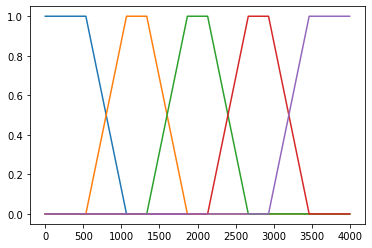

In [17]:
# plt.plot(torch.cat(ds[0].tasks_probs_over_iterations))
# cat_tensor = torch.cat(ds[0].tasks_probs_over_iterations, dim=0)
all_tensor = torch.stack(ds[0].tasks_probs_over_iterations)
print(all_tensor.size())
for i in range(5):
    plt.plot(all_tensor[:, i])
plt.show()

In [19]:
next(iter(ds[0].train_loader))[0].size()

torch.Size([128, 3, 32, 32])

In [24]:
for i, data in enumerate(ds[0].train_loader):
    print(data)

[tensor([[[[-2.4291e+00, -2.4291e+00, -2.4291e+00,  ..., -2.4291e+00,
           -2.4291e+00, -2.4291e+00],
          [ 2.1070e+00,  2.0876e+00,  2.0876e+00,  ...,  1.7387e+00,
           -2.4291e+00, -2.4291e+00],
          [ 2.1458e+00,  2.1070e+00,  2.1264e+00,  ...,  1.7581e+00,
           -2.4291e+00, -2.4291e+00],
          ...,
          [ 1.6224e+00,  1.6418e+00,  1.6418e+00,  ...,  1.7387e+00,
           -2.4291e+00, -2.4291e+00],
          [ 1.6224e+00,  1.6418e+00,  1.6418e+00,  ...,  1.6999e+00,
           -2.4291e+00, -2.4291e+00],
          [ 1.6224e+00,  1.6418e+00,  1.6418e+00,  ...,  1.7193e+00,
           -2.4291e+00, -2.4291e+00]],

         [[-2.4183e+00, -2.4183e+00, -2.4183e+00,  ..., -2.4183e+00,
           -2.4183e+00, -2.4183e+00],
          [ 2.2231e+00,  2.2035e+00,  2.2035e+00,  ...,  2.0855e+00,
           -2.4183e+00, -2.4183e+00],
          [ 2.2625e+00,  2.2428e+00,  2.2428e+00,  ...,  2.1051e+00,
           -2.4183e+00, -2.4183e+00],
          ...,
    

In [1]:
import pickle

# Pickling
with open("data/CIFAR10/cifar-10-batches-py/batches.meta","rb") as file_handle:
    retrieved_data = pickle.load(file_handle)
    print(retrieved_data)

{'num_cases_per_batch': 10000, 'label_names': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], 'num_vis': 3072}


Files already downloaded and verified


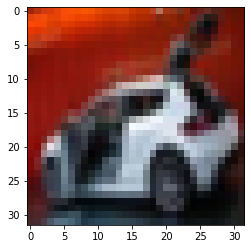

In [4]:
test_dataset = CIFAR10('/export/data/hliubm/ucl/data/CIFAR10', train=False, download=True)
test_mask = np.array(test_dataset.targets) == 1
test_dataset.data[test_mask][0]
plt.imshow(test_dataset.data[test_mask][0], interpolation='nearest')
plt.show()

In [3]:
retrieved_data['coarse_label_names']

['aquatic_mammals',
 'fish',
 'flowers',
 'food_containers',
 'fruit_and_vegetables',
 'household_electrical_devices',
 'household_furniture',
 'insects',
 'large_carnivores',
 'large_man-made_outdoor_things',
 'large_natural_outdoor_scenes',
 'large_omnivores_and_herbivores',
 'medium_mammals',
 'non-insect_invertebrates',
 'people',
 'reptiles',
 'small_mammals',
 'trees',
 'vehicles_1',
 'vehicles_2']

In [2]:
from torchvision.datasets import CIFAR10
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt


In [3]:
test_dataset = CIFAR100('/export/data/hliubm/ucl/data/CIFAR100', train=False, download=True)

Files already downloaded and verified


In [5]:
test_mask = np.isin(np.array(test_dataset.targets), [0, 1, 2, 3])
len(np.array(test_dataset.targets)[test_mask])

400

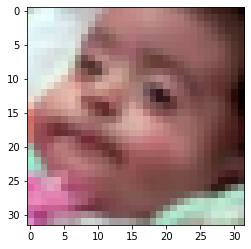

In [22]:
test_mask = np.array(test_dataset.targets) == 2
test_dataset.data[test_mask][0]
plt.imshow(test_dataset.data[test_mask][0], interpolation='nearest')
plt.show()

In [21]:
retrieved_data['fine_label_names'].index('baby')

2

In [26]:
selected_classes = [['apple', 'orange'], ['flatfish', 'shark'], ['bottle', 'bowl'], ['bed', 'chair'], ['bear', 'lion']]
class_indexes = [[retrieved_data['fine_label_names'].index(name) for name in names] for names in selected_classes]
cls_arr = np.array(class_indexes)
# for classes in class_indexes:
#     for cls in classes:
#         test_mask = (np.array(test_dataset.targets) == cls)
#         test_dataset.data[test_mask][0]
#         plt.imshow(test_dataset.data[test_mask][0], interpolation='nearest')
#         plt.show()

In [1]:
import torchvision.transforms as transforms
import torchvision
import torch
import numpy as np
import os
import codecs
from torch.distributions.categorical import Categorical
import torch.utils.data as data
from PIL import Image
import errno

In [13]:
torch.max(torch.Tensor([[0.1, 0.2, 0.5], [0.2, 0, 0.3]]).data, 1)[1] == torch.Tensor([0, 2])

tensor([False,  True])

In [17]:
scl_prefix = '_scl' if True else ''
'asd' + scl_prefix + '.txt'

'asd_scl.txt'

In [3]:
torch.load('checkpoints/cifar10_results/finetune_seq-cifar10_simsiam_0.pth')['state_dict']

OrderedDict([('backbone.conv1.weight',
              tensor([[[[-5.1966e-02, -1.4411e-02,  5.2845e-02],
                        [-1.1545e-01, -2.0239e-02,  1.2418e-01],
                        [-9.7703e-02,  8.9941e-03,  1.0532e-01]],
              
                       [[-7.9113e-03,  9.3986e-03,  5.4560e-02],
                        [-1.3025e-01, -4.3974e-02,  9.4603e-02],
                        [-7.7185e-02,  2.2170e-02,  1.1236e-01]],
              
                       [[-3.0670e-02, -2.7444e-02,  7.7315e-02],
                        [-8.6155e-02, -4.5333e-02,  1.0363e-01],
                        [-4.0201e-02, -1.5335e-02,  8.0266e-02]]],
              
              
                      [[[-7.3491e-03, -5.4041e-03, -2.6017e-03],
                        [-8.7795e-03,  2.2251e-03,  4.1531e-02],
                        [-1.9963e-02,  5.3577e-02,  4.4344e-02]],
              
                       [[-1.7692e-02, -3.2545e-02, -8.8903e-03],
                        [-1.9818e-02